In [1]:
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import make_scorer,f1_score,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, log_loss, accuracy_score,roc_curve
from sklearn.metrics import confusion_matrix, recall_score, precision_score
# define a function to print accuracy metrics  

In [3]:
def print_accuracy_metrics(Input, Output):
    print("Recall:", recall_score(Input, Output))
    print("Log Loss:", log_loss(Input, Output))
    print("Precision:", precision_score(Input, Output))
    print("Accuracy:", accuracy_score(Input, Output))
    print("AUC: ", roc_auc_score(Input, Output))
    print("F1 Score:", f1_score(Input, Output))
    
    confusion_matrix_value = confusion_matrix(Input, Output)
    print('Confusion matrix:\n', confusion_matrix_value)
    class_names = [0, 1]  # name of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    
    # create heatmap
    sns.heatmap(pd.DataFrame(confusion_matrix_value), annot=True, cmap="YlGnBu", fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [4]:
# defined a function to print cross validation score
scoring = {'recall' : make_scorer(recall_score)}
def cross_validation_metrics(model, x, y):
    scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
    print(f'Cross-Validation Accuracy Scores: {scores}')
    print(f'Mean Accuracy: {scores.mean()}')

In [5]:
# function for plotting feature importance
def feature_importance(model, X):
  importances = model.feature_importances_
  std = np.std([tree.feature_importances_ for tree in model.estimators_],
               axis=0)
  indices = np.argsort(importances)[::-1]

  # Print the feature ranking
  print("Feature ranking:")

  for f in range(X.shape[1]):
      print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

  # Plot the feature importances of the forest
  plt.figure()
  plt.title("Feature importances")
  plt.bar(range(X.shape[1]), importances[indices],
          color="r", yerr=std[indices], align="center")
  plt.xticks(range(X.shape[1]), indices)
  plt.xlim([-1, X.shape[1]])
  plt.show()

In [6]:
# function to draw ROC curve
def plot_auc_curve(model,):
  auc = roc_auc_score(y, y_pred_prob)
  fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
  
  plt.plot(fpr, tpr)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.title('ROC Curve\n AUC={auc}'.format(auc = auc))
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.grid(True)

In [7]:
### Reading data as a pandas dataframe
data = pd.read_csv('creditcard.csv')

In [8]:
#### Exploring data set
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
data.shape

(284807, 31)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

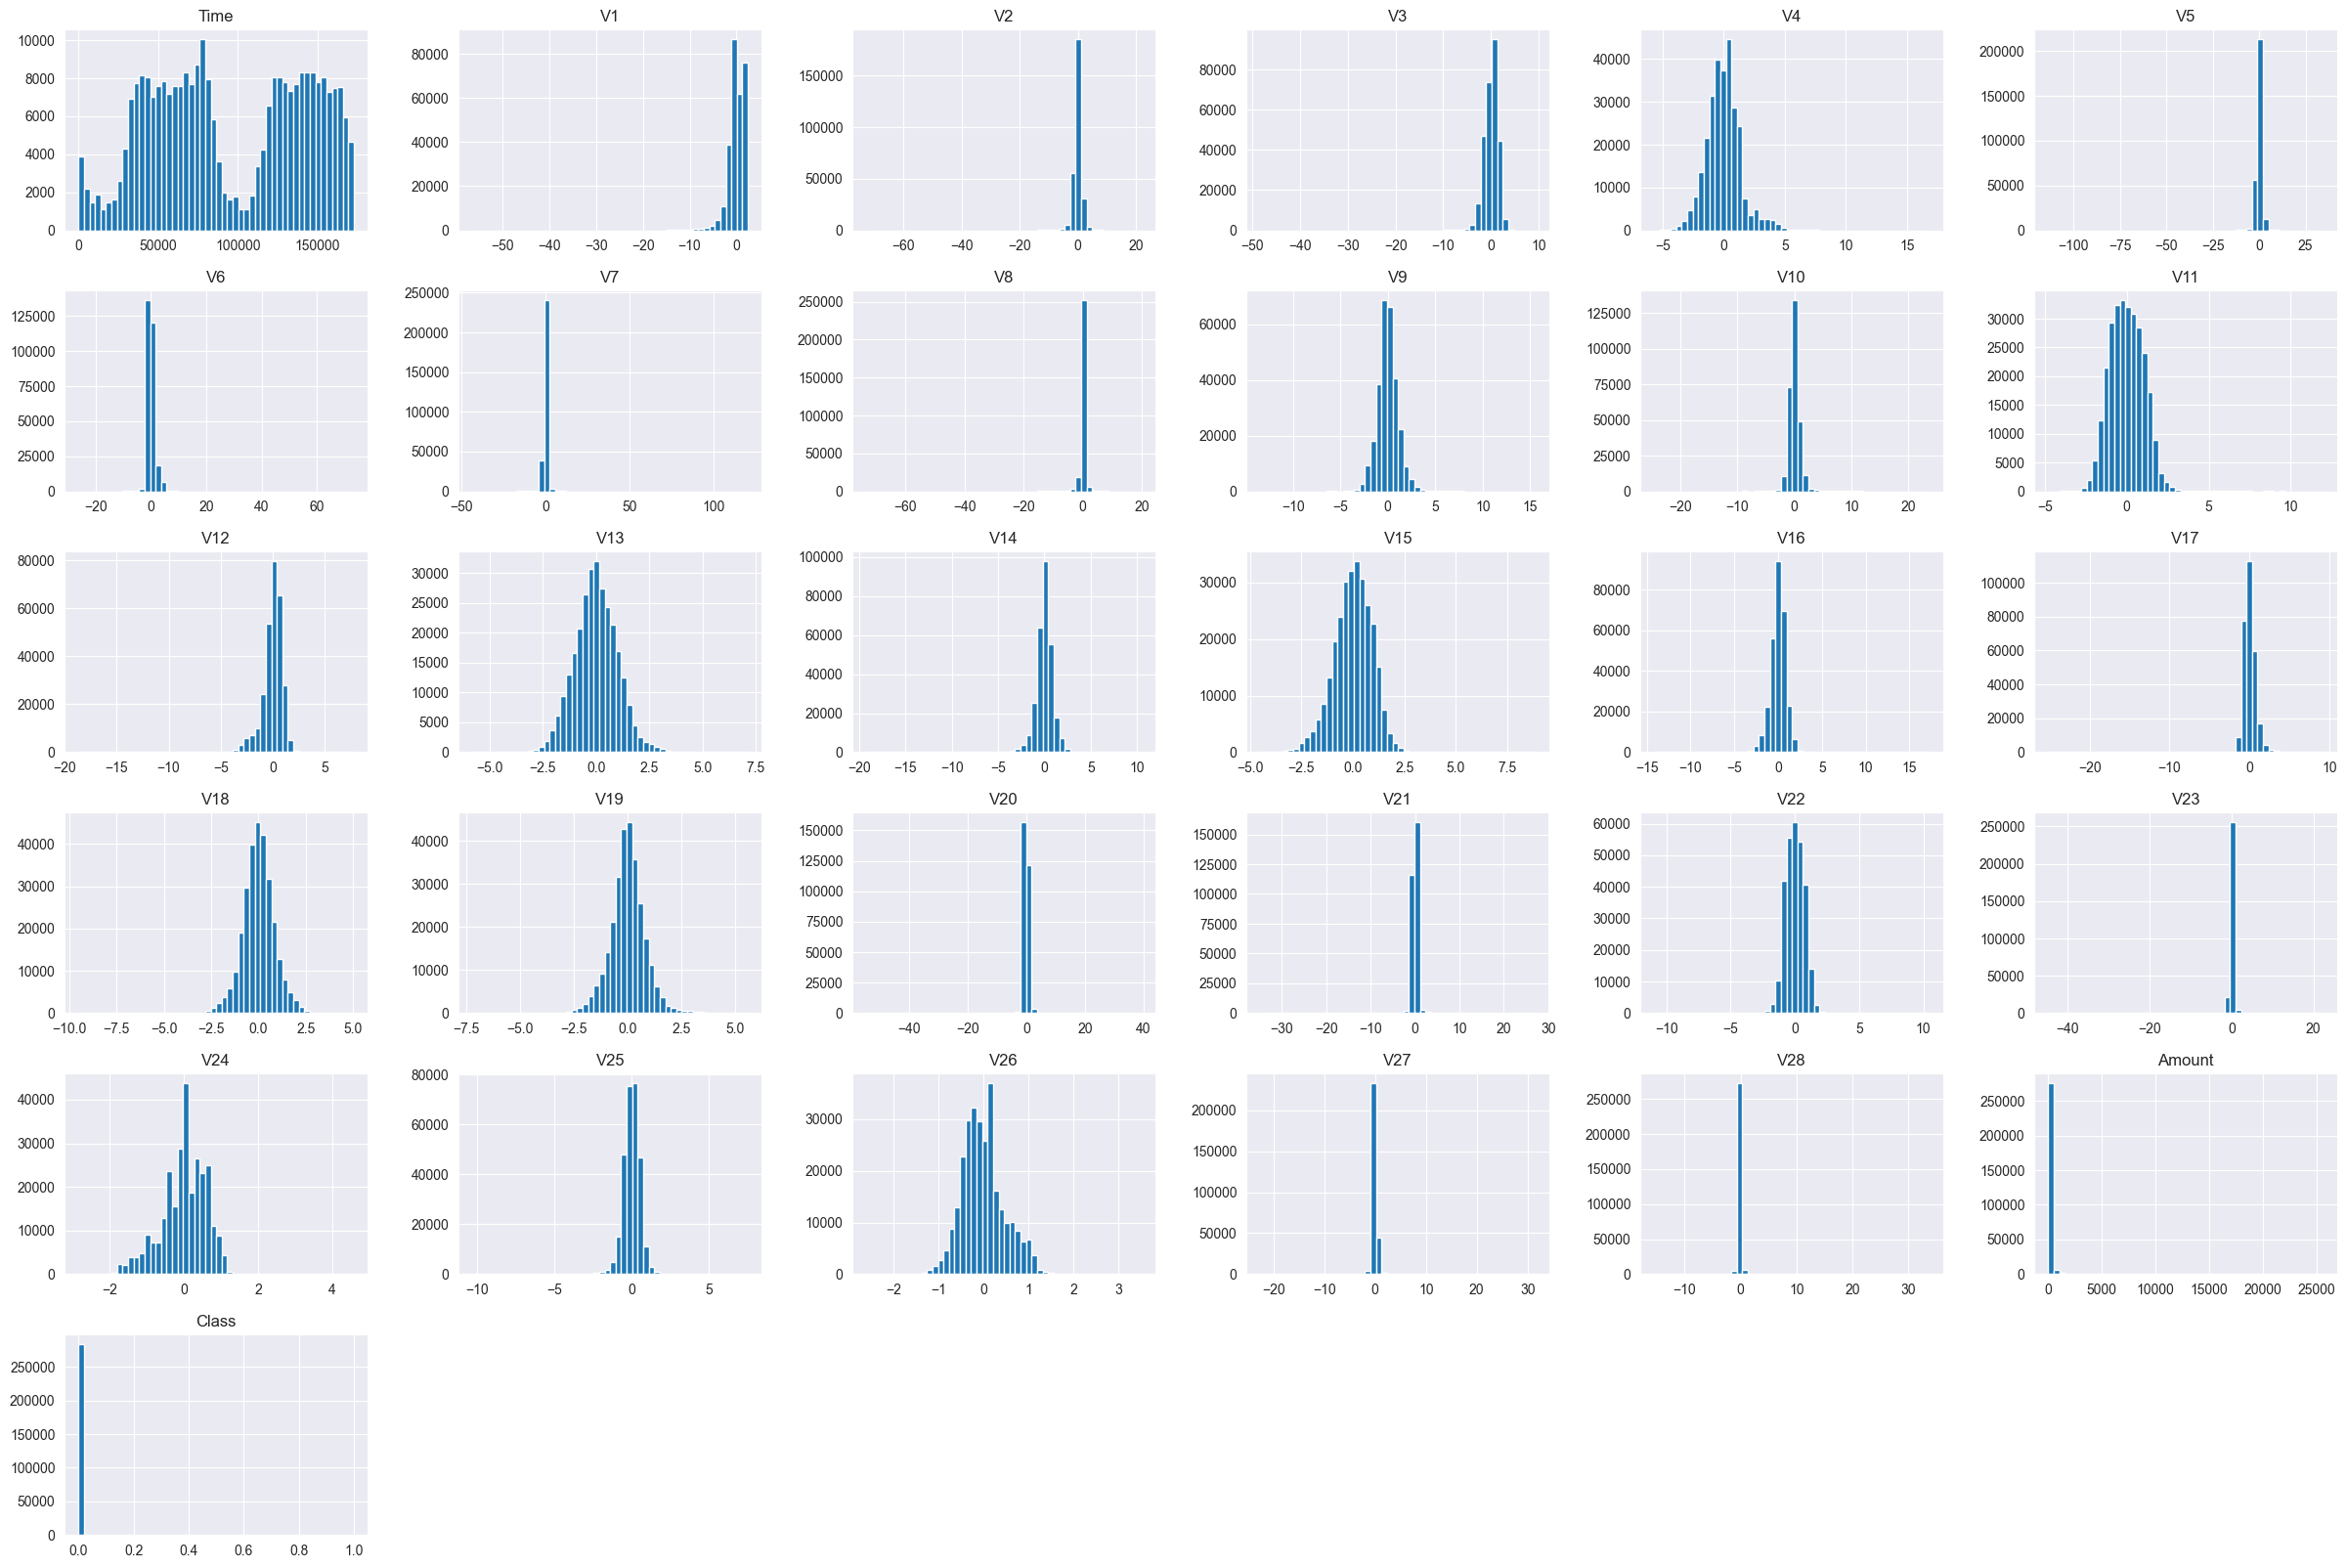

In [13]:
# Plot the histograms of each 
data.hist(bins=50, figsize=(30,20))
plt.show()

In [14]:
data.shape

(284807, 31)

In [15]:
data.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [16]:
#### Checking for null values in dataset
data.isnull().sum().max()

0

In [17]:
#### There are no null values in dataset 
####  Checking for unique values of ids
data.id.nunique()

AttributeError: 'DataFrame' object has no attribute 'id'

In [20]:
from sklearn.preprocessing import StandardScaler
data['normal_amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount','Time'], axis=1)
X = data.loc[:,data.columns != 'Class']
y = data.loc[:,data.columns == 'Class']

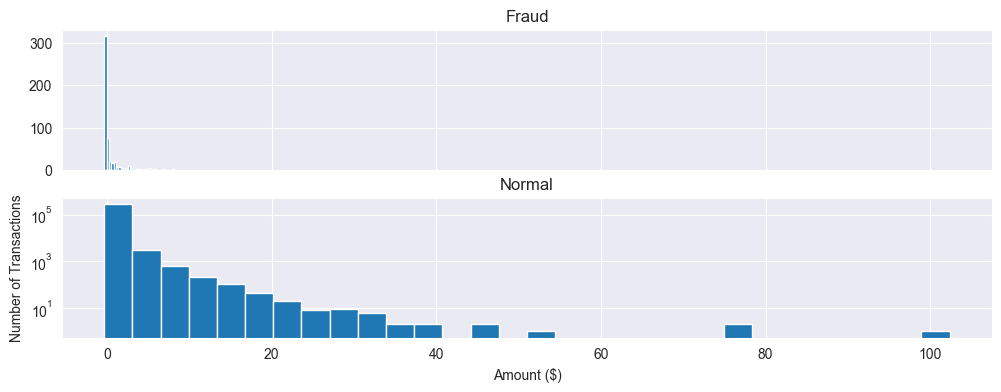

In [21]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(data.normal_amount[data.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data.normal_amount[data.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

Text(0, 0.5, 'Frequency')

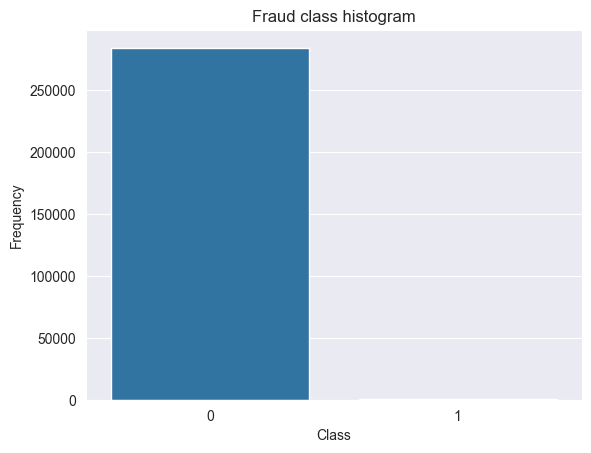

In [22]:
# Now lets check the class distributions
sns.countplot(x="Class",data=data)
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [23]:
# Showing ratio
print("Percentage of normal transactions: ", len(data[data.Class == 0])/len(data))
print("Percentage of fraud transactions: ", len(data[data.Class == 1])/len(data))
print("Total number of transactions in data: ", len(data))

Percentage of normal transactions:  0.9982725143693799
Percentage of fraud transactions:  0.001727485630620034
Total number of transactions in data:  284807


#### Splitting original dataset into test and train

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

### 1] Logistic regression on imbalanced dataset

In [25]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train, y_train)

LogisticRegression()

Cross-Validation Accuracy Scores: [0.99899681 0.99929777 0.99924761 0.99924761 0.99917235]
Mean Accuracy: 0.9991924318328269
Recall: 0.6190476190476191
Log Loss: 0.02748787367043729
Precision: 0.883495145631068
Accuracy: 0.999204147794436
AUC:  0.8094534662486266
F1 Score: 0.728
Confusion matrix:
 [[85284    12]
 [   56    91]]


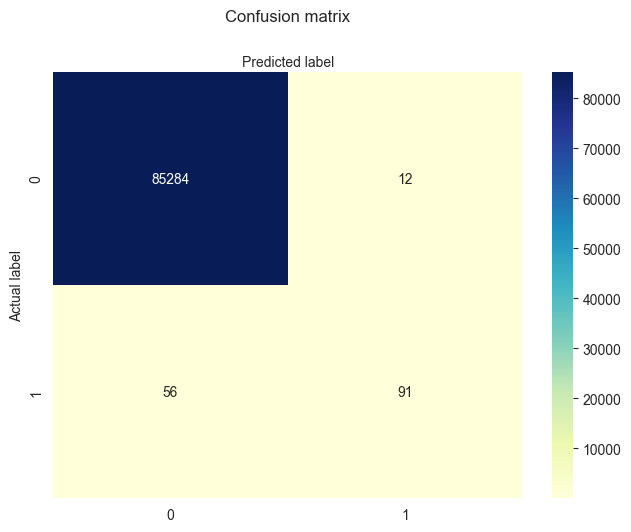

In [26]:
# Assuming lr.predict_proba returns probabilities
y_pred = logr.predict(X_test)
cross_validation_metrics(logr,X_train,y_train)
print_accuracy_metrics(y_test, y_pred)

### 2]  Using Class Weight (Logistic regression)
Scikit-learn logistic regression has a option named class_weight when specified does class imbalance handling implicitly. So trying to predict using this technique

In [27]:
logr_balanced = LogisticRegression(class_weight='balanced')
logr_balanced.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

Cross-Validation Accuracy Scores: [0.97514609 0.97391719 0.97823088 0.97614927 0.97665028]
Mean Accuracy: 0.9760187427596666
Recall: 0.9115646258503401
Log Loss: 0.7886743485866663
Precision: 0.06467181467181467
Accuracy: 0.9771660639256581
AUC:  0.9444218739831329
F1 Score: 0.12077512392969804
Confusion matrix:
 [[83358  1938]
 [   13   134]]


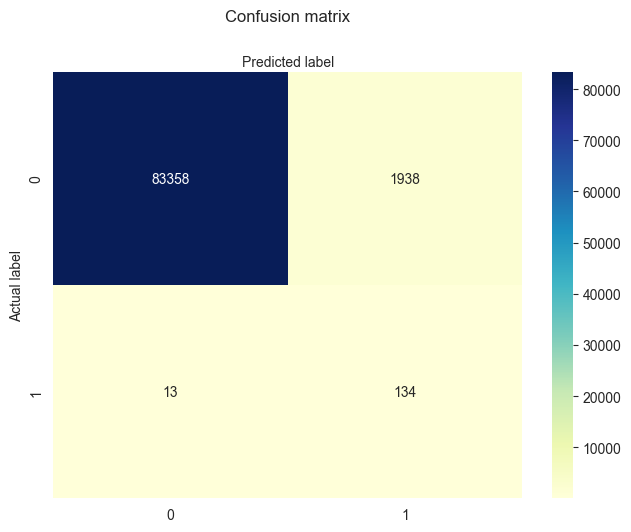

In [30]:
# Assuming lr.predict_proba returns probabilities
y_pred_balanced = logr_balanced.predict(X_test)
cross_validation_metrics(logr_balanced,X_train,y_train)
print_accuracy_metrics(y_test, y_pred_balanced)

In [31]:
y_balanced_pred_prob = logr_balanced.predict_proba(X_test)[:, 1]


In [32]:
print('Prob:', y_balanced_pred_prob[0:20])
print('Prob:', y_pred_balanced[0:20])

Prob: [0.11787737 0.10846437 0.16225886 0.04103306 0.06945814 0.80536086
 0.33631759 0.01522809 0.01659318 0.45299479 0.03836546 0.02968987
 0.0013642  0.00311836 0.00773784 0.05655792 0.01762419 0.00896546
 0.09345336 0.0514922 ]
Prob: [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


#### Guassian Naive Bayes   

In [33]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

Cross-Validation Accuracy Scores: [0.97885787 0.97752865 0.9771023  0.9769769  0.97880718]
Mean Accuracy: 0.9778545823348279
Recall: 0.8367346938775511
Log Loss: 0.7458246844742187
Precision: 0.06327160493827161
Accuracy: 0.9784066570696254
AUC:  0.9076927549297715
F1 Score: 0.11764705882352942
Confusion matrix:
 [[83475  1821]
 [   24   123]]


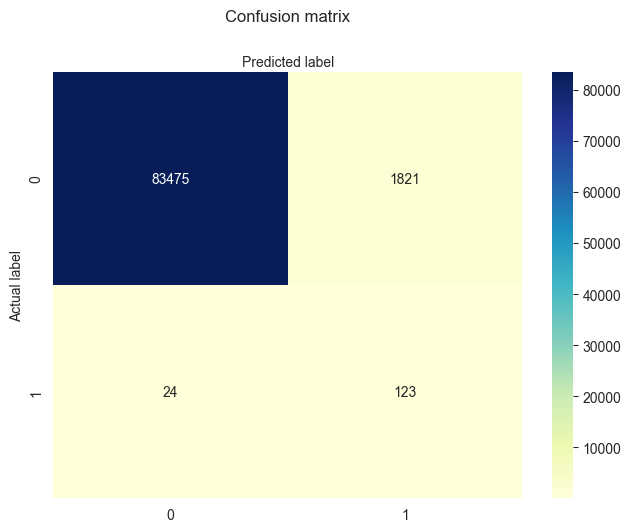

In [34]:
#prediciting the test data
y_gnb_pred = gnb.predict(X_test)
cross_validation_metrics(gnb,X_train,y_train)
print_accuracy_metrics(y_test, y_gnb_pred)

### 3] Decision Tree

Cross-Validation Accuracy Scores: [0.99917237 0.99917237 0.99924761 0.99909713 0.99912219]
Mean Accuracy: 0.9991623360278435
Recall: 0.7619047619047619
Log Loss: 0.023041417619389045
Precision: 0.835820895522388
Accuracy: 0.9993328885923949
AUC:  0.8808234182812124
F1 Score: 0.797153024911032
Confusion matrix:
 [[85274    22]
 [   35   112]]


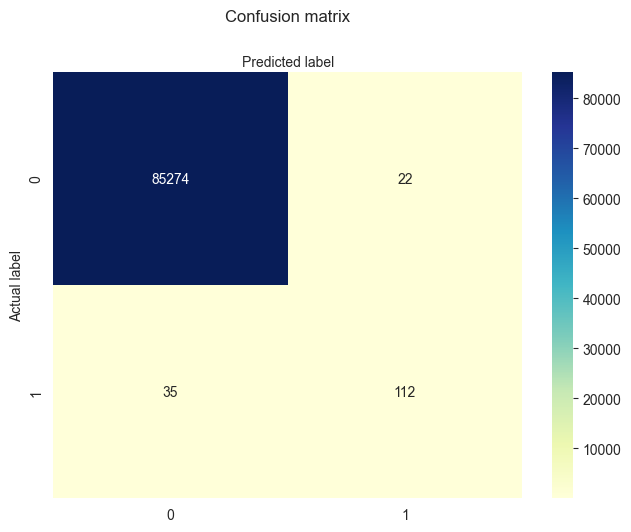

In [35]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)
cross_validation_metrics(dtc,X_train,y_train)
print_accuracy_metrics(y_test, y_pred_dtc )

##### Undersampling of the dataset
Undersampling is one of the techniques used for handling class imbalance. In this technique, we under sample majority class to match the minority class. So in our example, we take random sample of non-fraud class to match number of fraud samples. This makes sure that the training data has equal amount of fraud and non-fraud samples.

In [36]:
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

In [37]:
normal_indices = data[data.Class == 0].index

In [38]:
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

add them

In [39]:
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

In [40]:
under_sample = data.iloc[under_sample_indices,:]

In [41]:
under_sample.shape

(984, 30)

There are 984 so, basically random, i can do it agian it will change suprising it did not change

1    492
0    492
Name: Class, dtype: int64


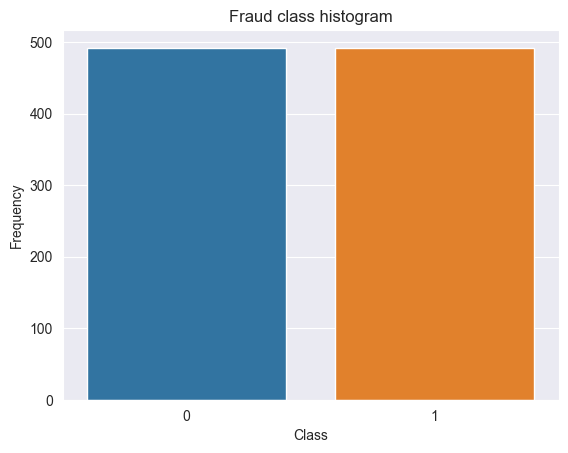

In [42]:
# Now lets check the class distributions
sns.countplot(x="Class",data=under_sample)
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
count = under_sample['Class'].value_counts()
print(count)

<AxesSubplot:>

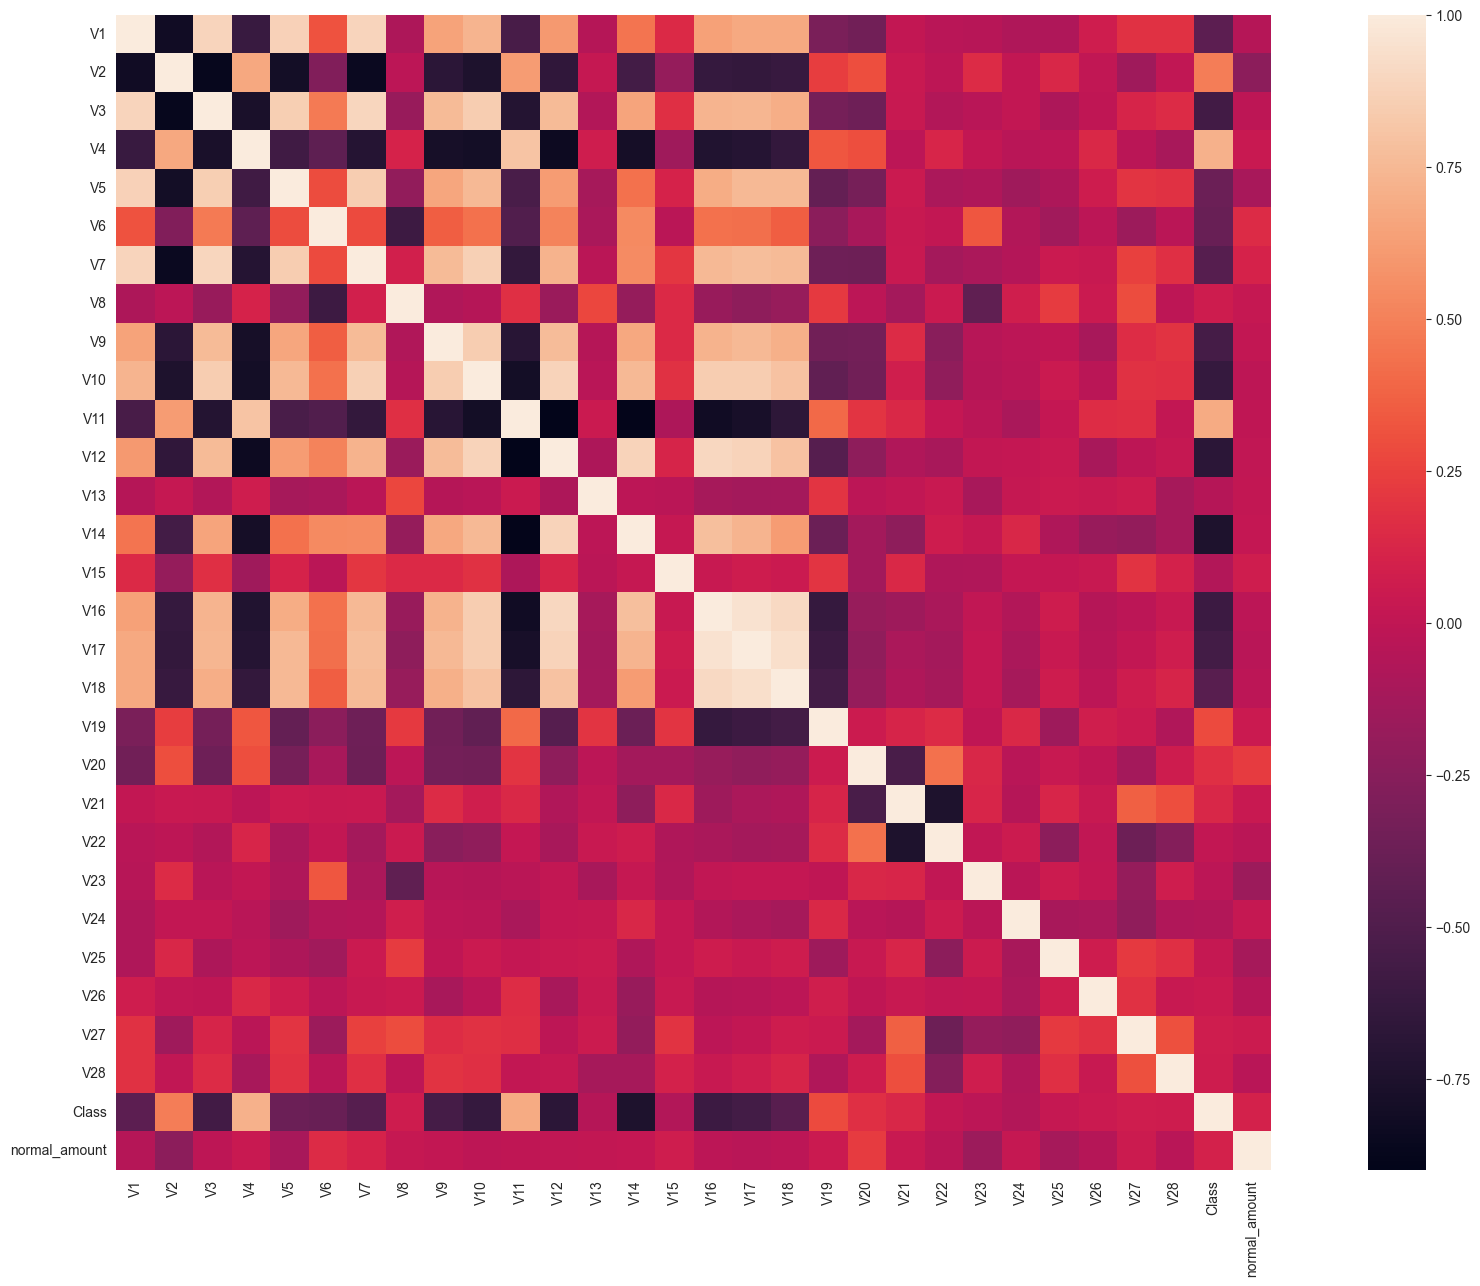

In [43]:
# correlation matrix
corrmat =under_sample.corr()
fig,ax= plt.subplots()
fig.set_size_inches(25,15)
sns.heatmap(corrmat,square=True)

If we try to correlate class and features on imbalanced dataset then it will be of no use because we will not see true correlations of features with result. While now I am going to see the features and their correlations w.r.t class on undersampled dataframe.

In [49]:
from sklearn.ensemble import RandomForestClassifier
X_under_train = under_sample.iloc[:, under_sample.columns != 'Class']
y_under_train = under_sample.iloc[:, under_sample.columns == 'Class']
rf = RandomForestClassifier(n_estimators=100, 
                            criterion='gini', 
                            max_features='sqrt',
                            n_jobs=-1)
rf.fit(X_under_train, y_under_train)

RandomForestClassifier(max_features='sqrt', n_jobs=-1)

Feature ranking:
1. V14 (0.183184)
2. V4 (0.128593)
3. V10 (0.122272)
4. V12 (0.106987)
5. V17 (0.095502)
6. V11 (0.052084)
7. V3 (0.040399)
8. V16 (0.039050)
9. V7 (0.032835)
10. V21 (0.017480)
11. V9 (0.016683)
12. V2 (0.016427)
13. V19 (0.015418)
14. normal_amount (0.012253)
15. V20 (0.011687)
16. V18 (0.011304)
17. V27 (0.010674)
18. V5 (0.009697)
19. V8 (0.009280)
20. V6 (0.008389)
21. V1 (0.008249)
22. V15 (0.007588)
23. V13 (0.007581)
24. V26 (0.007082)
25. V23 (0.007002)
26. V22 (0.006891)
27. V28 (0.005485)
28. V24 (0.005098)
29. V25 (0.004830)


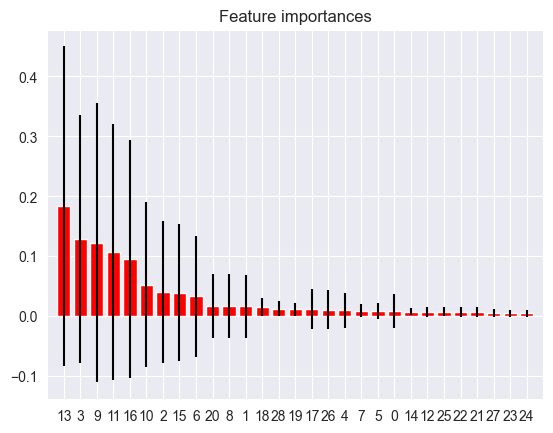

In [50]:
feature_importance(rf,X_under_train)


We can see all the features that are important.
V14, V10, V4, 12, 11, 16, 11, 3, 7 this impact the most

In [51]:
#negative correlations smaller than -0.5
corr = under_sample.corr()
corr = corr[['Class']]
corr[corr.Class < -0.6]

,Class
V10,-0.628642
V12,-0.680639
V14,-0.747790


In [52]:
#positive correlations greater than 0.5
corr[corr.Class > 0.6]

,Class
V4,0.713026
V11,0.686733
Class,1.000000


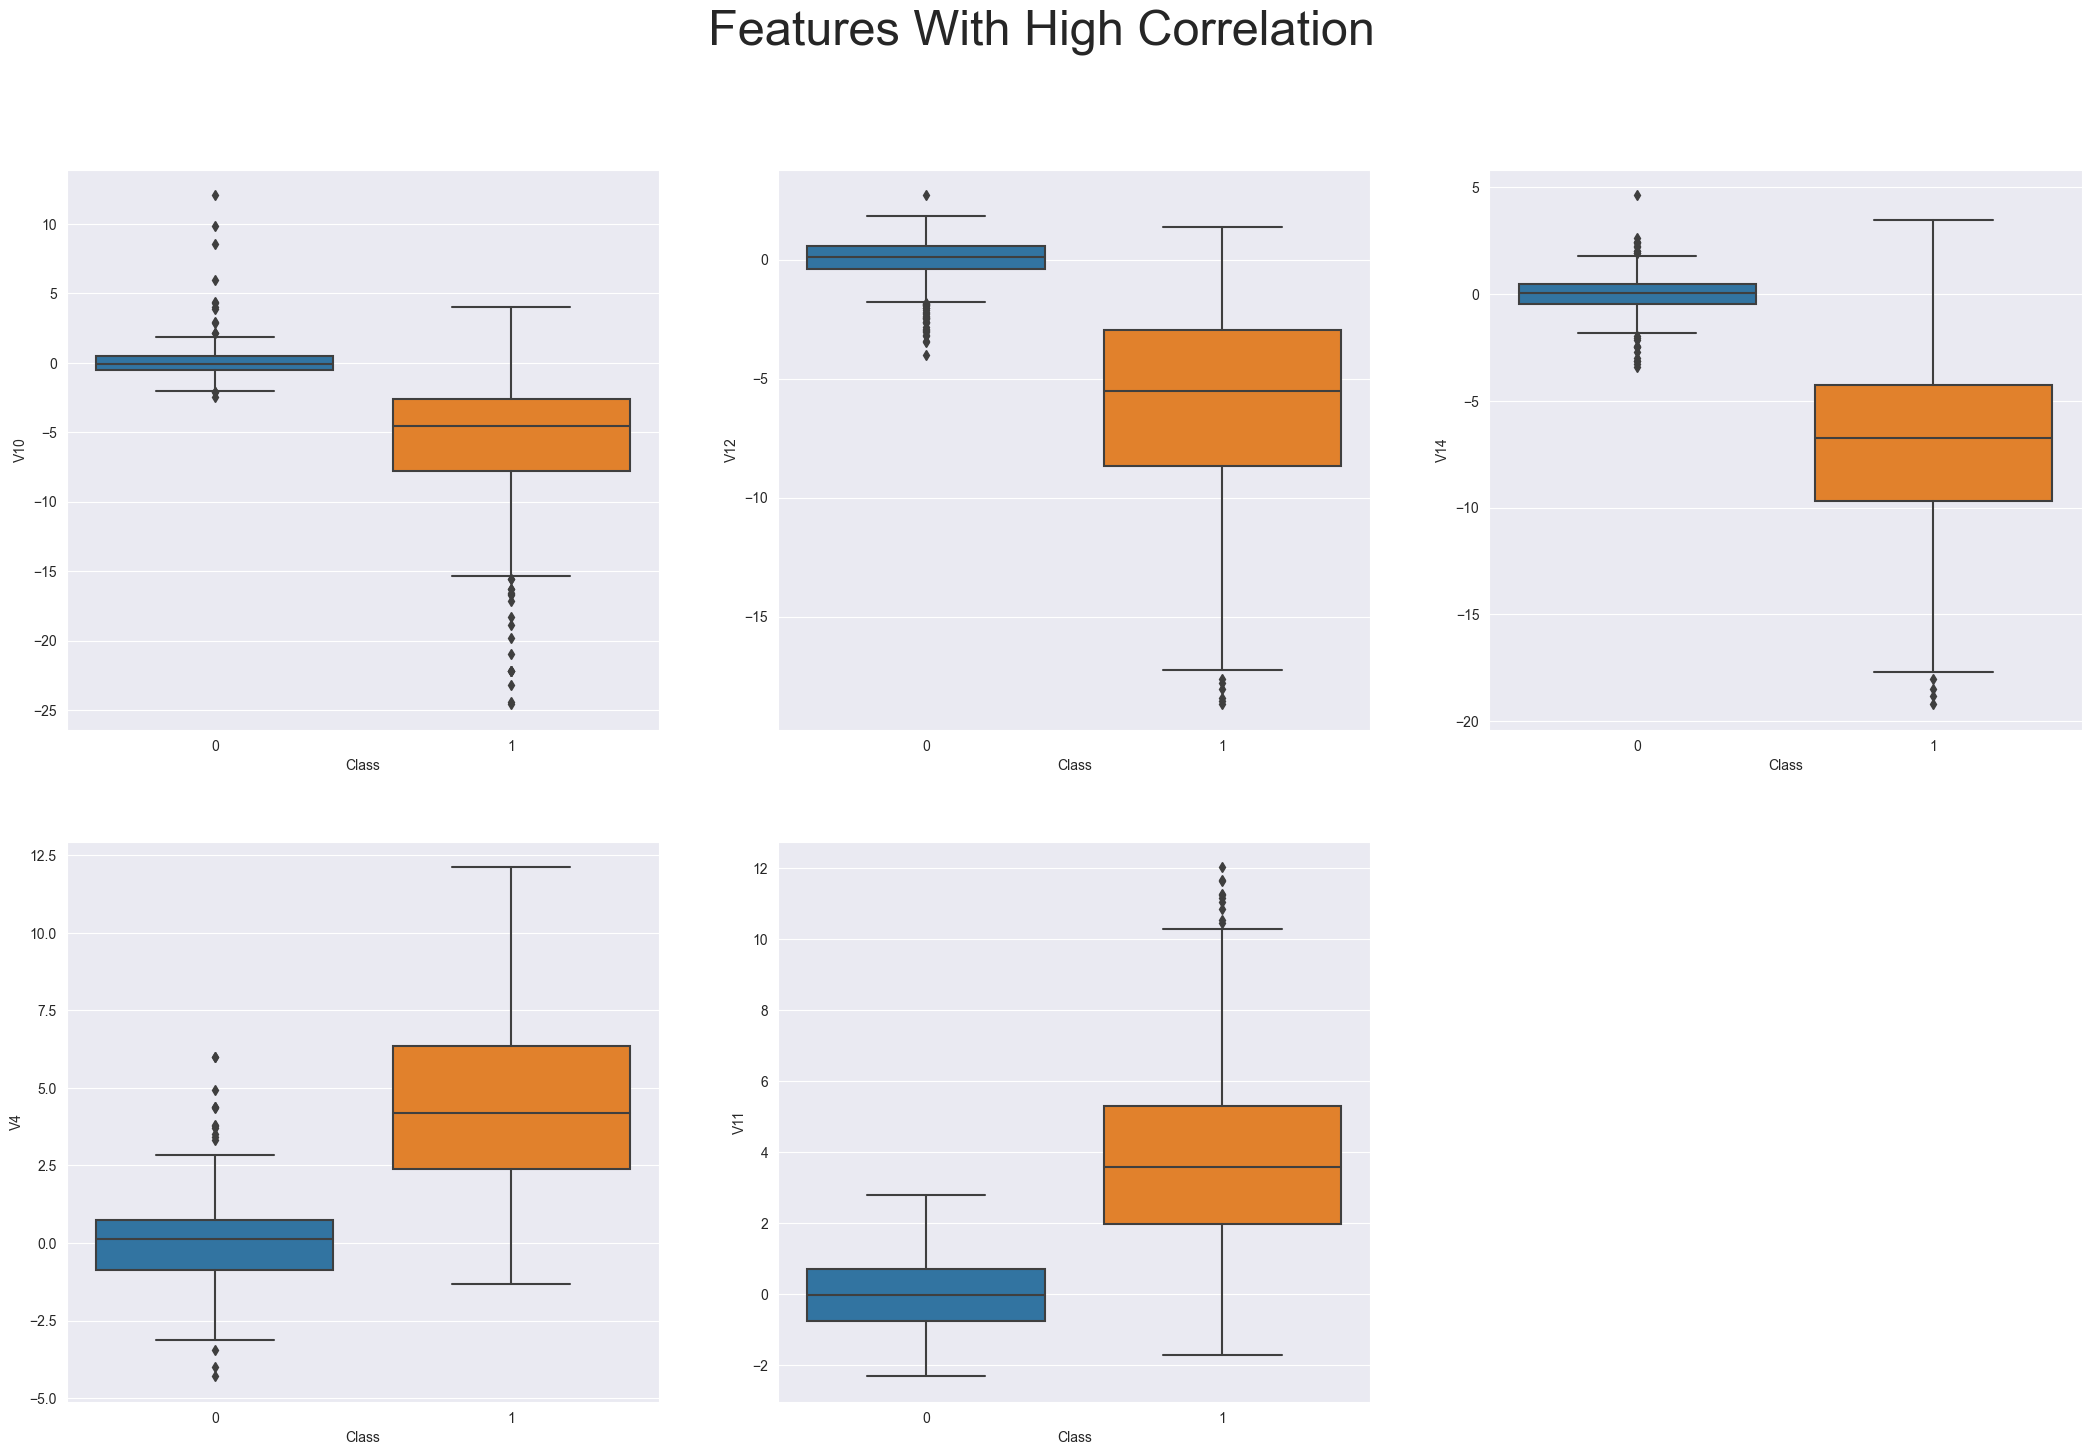

In [53]:
#visualizing the features with high correlation
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(26,16))
f.suptitle('Features With High Correlation', size=35)
sns.boxplot(x="Class", y="V10", data=under_sample, ax=axes[0,0])
sns.boxplot(x="Class", y="V12", data=under_sample, ax=axes[0,1])
sns.boxplot(x="Class", y="V14", data=under_sample, ax=axes[0,2])
sns.boxplot(x="Class", y="V4", data=under_sample, ax=axes[1,0])
sns.boxplot(x="Class", y="V11", data=under_sample, ax=axes[1,1])
f.delaxes(axes[1, 2])

In [54]:
under_sample.shape

(984, 30)

In [55]:
v14_fraud = under_sample['V14'].loc[under_sample['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
v14_iqr = q75 - q25
v14_cut_off = v14_iqr * 2.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
under_sample= under_sample.drop(under_sample[(under_sample['V14'] > v14_upper) | (under_sample['V14'] < v14_lower)].index)


In [56]:
v12_fraud = under_sample['V12'].loc[under_sample['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25
v12_cut_off = v12_iqr * 2.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
under_sample= under_sample.drop(under_sample[(under_sample['V12'] > v12_upper) | (under_sample['V12'] < v12_lower)].index)


In [57]:
v_10_fraud = under_sample['V10'].loc[under_sample['Class'] == 1].values
q25, q75 = np.percentile(v_10_fraud, 25), np.percentile(v_10_fraud, 75)
v_10_iqr = q75 - q25 # cut off outlier
v10_cut_off = v_10_iqr * 2.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
under_sample= under_sample.drop(under_sample[(under_sample['V10'] > v10_upper) | (under_sample['V10'] < v10_lower)].index)


In [58]:
v_4_fraud = under_sample['V4'].loc[under_sample['Class'] == 1].values
q25, q75 = np.percentile(v_4_fraud, 25), np.percentile(v_4_fraud, 75)
v_4_iqr = q75 - q25 # cut off outlier
v4_cut_off = v_4_iqr * 2.5
v4_lower, v4_upper = q25 - v4_cut_off, q75 + v4_cut_off
under_sample= under_sample.drop(under_sample[(under_sample['V4'] > v4_upper) | (under_sample['V4'] < v4_lower)].index)


In [59]:
v_11_fraud = under_sample['V11'].loc[under_sample['Class'] == 1].values
q25, q75 = np.percentile(v_11_fraud, 25), np.percentile(v_11_fraud, 75)
v_11_iqr = q75 - q25 # cut off outlier
v11_cut_off = v_11_iqr * 2.5
v11_lower, v11_upper = q25 - v11_cut_off, q75 + v11_cut_off
under_sample= under_sample.drop(under_sample[(under_sample['V11'] > v11_upper) | (under_sample['V11'] < v11_lower)].index)


In [60]:
under_sample.shape # there were 984 - 975 = 8 outliers

(975, 30)

In [61]:
X_under = under_sample.loc[:,under_sample.columns != 'Class']
y_under = under_sample.loc[:,under_sample.columns == 'Class']
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_under,y_under,test_size = 0.3, random_state = 0)

In [62]:
lr_under_C001 = LogisticRegression(C=0.01,penalty = 'l2')
lr_under_C001.fit(X_under_train,y_under_train)
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normal_amount
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,...,0.186409,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,-0.193306
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,...,-0.096502,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,-0.345313
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,...,0.419835,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0.030587
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,...,-0.987790,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0.878181
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,...,-0.126871,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,-0.333239


Cross-Validation Accuracy Scores: [0.90510949 0.9270073  0.90441176 0.97058824 0.94852941]
Mean Accuracy: 0.9311292400171748
Recall: 0.891156462585034
Log Loss: 0.48306801630664353
Precision: 0.1
Accuracy: 0.9860140678581042
AUC:  0.9386670045057979
F1 Score: 0.17982155113246398
Confusion matrix:
 [[84117  1179]
 [   16   131]]


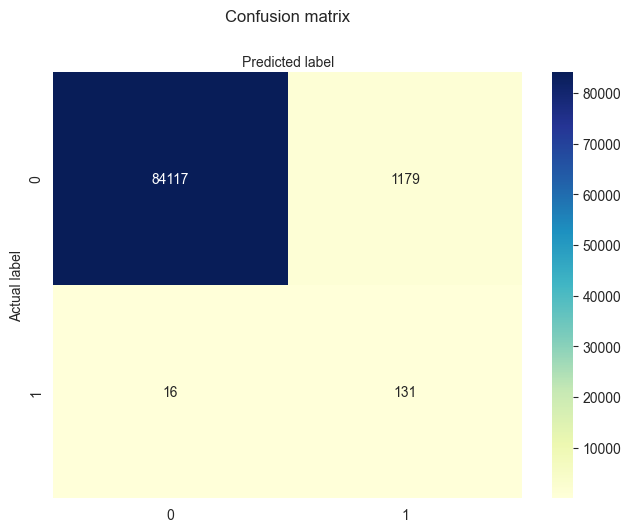

In [63]:
y_under_C1_pred = lr_under_C001.predict(X_test)
cross_validation_metrics(lr_under_C001, X_under_train, y_under_train)
print_accuracy_metrics(y_test, y_under_C1_pred )

Cross-Validation Accuracy Scores: [0.90510949 0.93430657 0.94117647 0.97058824 0.92647059]
Mean Accuracy: 0.9355302705023616
Recall: 0.9251700680272109
Log Loss: 0.8966067525185258
Precision: 0.05804524114383269
Accuracy: 0.9740411736479291
AUC:  0.9496477333195519
F1 Score: 0.10923694779116466
Confusion matrix:
 [[83089  2207]
 [   11   136]]


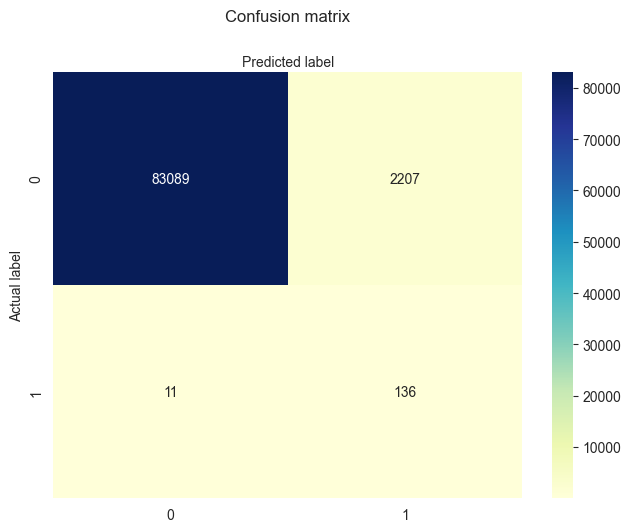

In [64]:
lr_under_C01 = LogisticRegression(C=0.1, penalty='l2')
lr_under_C01.fit(X_under_train, y_under_train)
X_test.head()
y_under_C1_pred = lr_under_C01.predict(X_test)
cross_validation_metrics(lr_under_C01, X_under_train, y_under_train)
print_accuracy_metrics(y_test, y_under_C1_pred)

Cross-Validation Accuracy Scores: [0.89781022 0.94160584 0.94117647 0.96323529 0.92647059]
Mean Accuracy: 0.9340596822670675
Recall: 0.9251700680272109
Log Loss: 1.0643668269169138
Precision: 0.049311094996374184
Accuracy: 0.9691841344522079
AUC:  0.9472150283861435
F1 Score: 0.093631669535284
Confusion matrix:
 [[82674  2622]
 [   11   136]]


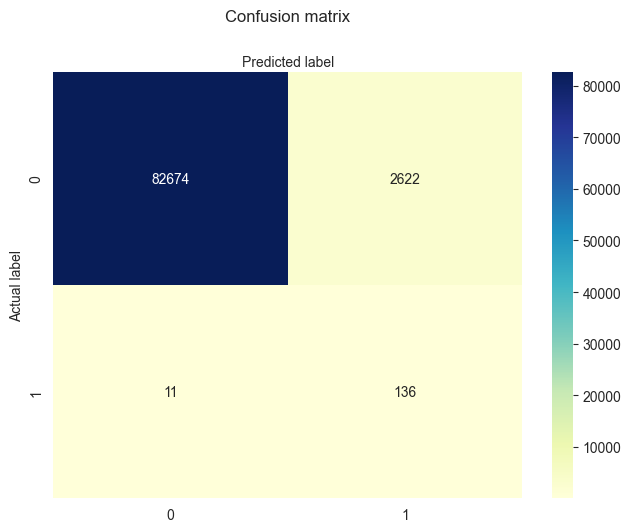

In [65]:
lr_under_C01 = LogisticRegression(C=0.5, penalty='l2')
lr_under_C01.fit(X_under_train, y_under_train)
X_test.head()
y_under_C1_pred = lr_under_C01.predict(X_test)
cross_validation_metrics(lr_under_C01, X_under_train, y_under_train)
print_accuracy_metrics(y_test, y_under_C1_pred)

Cross-Validation Accuracy Scores: [0.89781022 0.94160584 0.94117647 0.96323529 0.91911765]
Mean Accuracy: 0.9325890940317734
Recall: 0.9183673469387755
Log Loss: 1.099131555867722
Precision: 0.047501759324419426
Accuracy: 0.9681776154863476
AUC:  0.9433154029760469
F1 Score: 0.09033121445299432
Confusion matrix:
 [[82589  2707]
 [   12   135]]


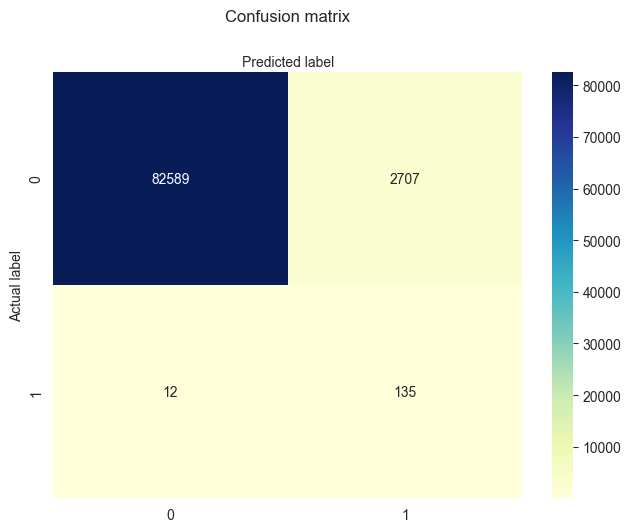

In [66]:
lr_under_C1 = LogisticRegression(C=1, penalty='l2')
lr_under_C1.fit(X_under_train, y_under_train)
X_test.head()
y_under_C1_pred = lr_under_C1.predict(X_test)
cross_validation_metrics(lr_under_C1, X_under_train, y_under_train)
print_accuracy_metrics(y_test, y_under_C1_pred )

Cross-Validation Accuracy Scores: [0.89781022 0.93430657 0.94117647 0.96323529 0.91911765]
Mean Accuracy: 0.9311292400171748
Recall: 0.9183673469387755
Log Loss: 1.0946849032933068
Precision: 0.047686329918756626
Accuracy: 0.9683063562843065
AUC:  0.9433798843116311
F1 Score: 0.09066487575554064
Confusion matrix:
 [[82600  2696]
 [   12   135]]


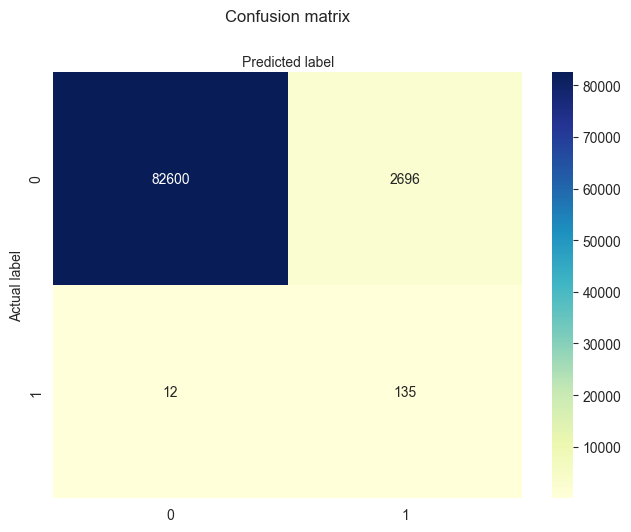

In [67]:
lr_under_C5 = LogisticRegression(C=5, penalty='l2')
lr_under_C5.fit(X_under_train, y_under_train)
X_test.head()
y_under_C1_pred = lr_under_C5.predict(X_test)
cross_validation_metrics(lr_under_C5, X_under_train, y_under_train)
print_accuracy_metrics(y_test, y_under_C1_pred)

Cross-Validation Accuracy Scores: [0.90510949 0.93430657 0.94117647 0.95588235 0.91911765]
Mean Accuracy: 0.9311185057964793
Recall: 0.9183673469387755
Log Loss: 1.0918552152914063
Precision: 0.04780453257790368
Accuracy: 0.968388282246644
AUC:  0.9434209178888212
F1 Score: 0.09087849209020532
Confusion matrix:
 [[82607  2689]
 [   12   135]]


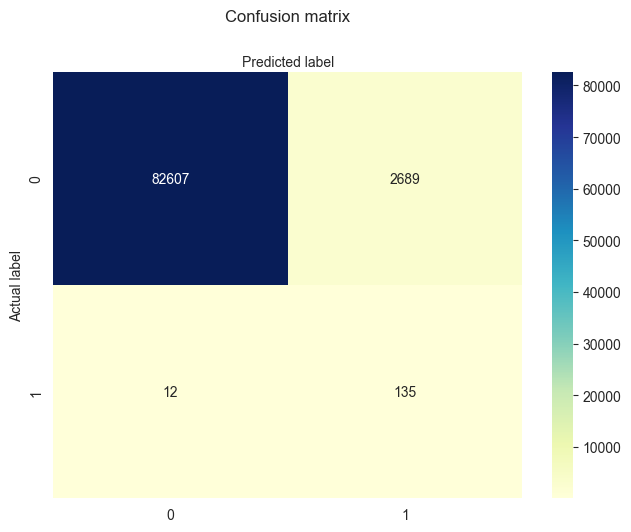

In [68]:
lr_under_C5 = LogisticRegression(C=10, penalty='l2')
lr_under_C5.fit(X_under_train, y_under_train)
X_test.head()
y_under_C1_pred = lr_under_C5.predict(X_test)
cross_validation_metrics(lr_under_C5, X_under_train, y_under_train)
print_accuracy_metrics(y_test, y_under_C1_pred)

Cross-Validation Accuracy Scores: [0.88321168 0.91240876 0.89705882 0.93382353 0.88970588]
Mean Accuracy: 0.9032417346500644
Recall: 0.9591836734693877
Log Loss: 3.3337766512324087
Precision: 0.016821760916249106
Accuracy: 0.9034795126575612
AUC:  0.9312835925028424
F1 Score: 0.03306366514245515
Confusion matrix:
 [[77055  8241]
 [    6   141]]


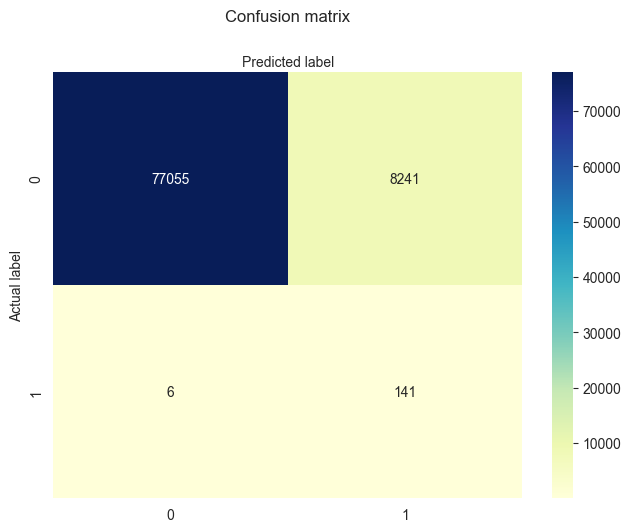

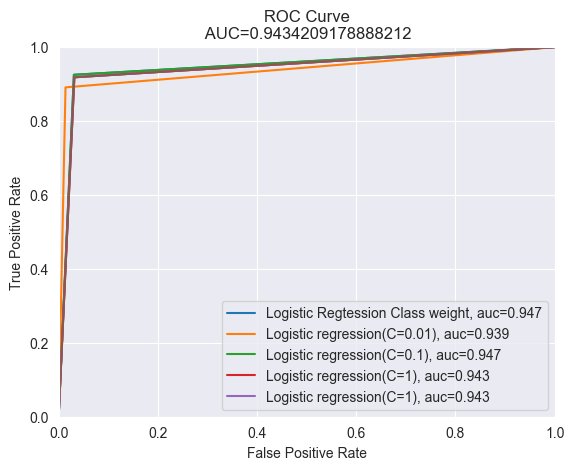

In [69]:
DecisionTreeClassifier = DecisionTreeClassifier()
DecisionTreeClassifier.fit(X_under_train, y_under_train)
# Prediction on original dataset
y_pred_DecisionTree = DecisionTreeClassifier.predict(X_test)
cross_validation_metrics(DecisionTreeClassifier, X_under_train, y_under_train)
print_accuracy_metrics(y_test, y_pred_DecisionTree)
plt.figure(0).clf()

y_balanced_pred = lr_under_C01.predict(X_test)
y_pred_full_model1 = lr_under_C001.predict(X_test)
y_pred_full_model2 = lr_under_C01.predict(X_test)
y_pred_full_model3 = lr_under_C1.predict(X_test)
y_pred_full_model4 = lr_under_C5.predict(X_test)


fpr, tpr, thresh = metrics.roc_curve(y_test, y_balanced_pred)
auc = metrics.roc_auc_score(y_test, y_balanced_pred)
plt.plot(fpr, tpr, label="Logistic Regtession Class weight, auc=" + '{0:.3f}'.format(auc))

fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_full_model1)
auc = metrics.roc_auc_score(y_test, y_pred_full_model1)
plt.plot(fpr, tpr, label="Logistic regression(C=0.01), auc=" + '{0:.3f}'.format(auc))

fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_full_model2)
auc = metrics.roc_auc_score(y_test, y_pred_full_model2)
plt.plot(fpr, tpr, label="Logistic regression(C=0.1), auc=" + '{0:.3f}'.format(auc))

fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_full_model3)
auc = metrics.roc_auc_score(y_test, y_pred_full_model3)
plt.plot(fpr, tpr, label="Logistic regression(C=1), auc=" + '{0:.3f}'.format(auc))

fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_full_model4)
auc = metrics.roc_auc_score(y_test, y_pred_full_model4)
plt.plot(fpr, tpr, label="Logistic regression(C=1), auc=" + '{0:.3f}'.format(auc))


plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve\n AUC={auc}'.format(auc=auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend(loc="lower right")

Cross-Validation Accuracy Scores: [0.99917237 0.99917237 0.99924761 0.99909713 0.99912219]
Mean Accuracy: 0.9991623360278435
Recall: 0.9591836734693877
Log Loss: 3.6511059485883957
Precision: 0.015381258863314061
Accuracy: 0.8942921011668598
AUC:  0.9266819699179615
F1 Score: 0.030277002362035645
Confusion matrix:
 [[76270  9026]
 [    6   141]]


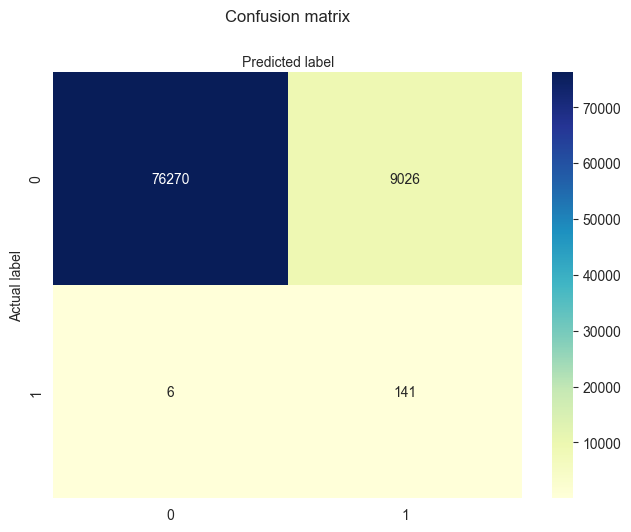

In [70]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_under_train, y_under_train)

y_pred_dtc = dtc.predict(X_test)
cross_validation_metrics(dtc,X_train,y_train)
print_accuracy_metrics(y_test, y_pred_dtc)

Cross-Validation Accuracy Scores: [0.99917237 0.99917237 0.99924761 0.99909713 0.99912219]
Mean Accuracy: 0.9991623360278435
Recall: 0.7619047619047619
Log Loss: 0.023041417619389045
Precision: 0.835820895522388
Accuracy: 0.9993328885923949
AUC:  0.8808234182812124
F1 Score: 0.797153024911032
Confusion matrix:
 [[85274    22]
 [   35   112]]


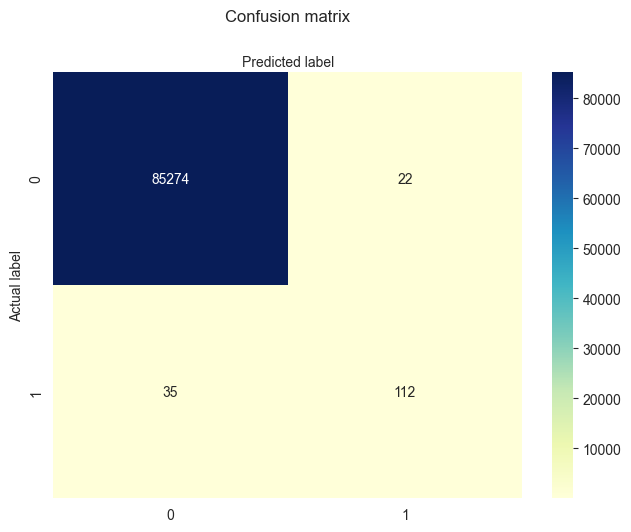

In [71]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)
cross_validation_metrics(dtc,X_train,y_train)
print_accuracy_metrics(y_test, y_pred_dtc)

In [ ]:
# Let's implement simple classifiers
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [ ]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

## Comprehensive Overview of Different Models:

1. *Logistic Regression (Imbalanced Data)*:
   - *Accuracy*: ~99.92%
   - *Recall*: 0.619
   - *Precision*: 0.883
   - *F1 Score*: 0.728
   - *AUC*: 0.809
   - *Details*: This model performed well in terms of accuracy but had lower recall, indicating that it missed a significant number of fraud cases.

2. *Logistic Regression with Class Weight (Balanced Data)*:
   - *Accuracy*: ~97.70%
   - *Recall*: 0.911
   - *Precision*: 0.065
   - *F1 Score*: 0.121
   - *AUC*: 0.944
   - *Details*: Adjusting for class imbalance improved recall but drastically reduced precision, which could lead to many false positives.

3. *Logistic Regression with Different Regularisation Strengths*:
   - *C=0.01*:
     - *Accuracy*: ~93.11%
     - *Recall*: 0.891
     - *Precision*: 0.100
     - *F1 Score*: 0.180
     - *AUC*: 0.939
   - *C=0.1*:
     - *Accuracy*: ~97.40%
     - *Recall*: 0.925
     - *Precision*: 0.058
     - *F1 Score*: 0.109
     - *AUC*: 0.950
   - *C=1*:
     - *Accuracy*: ~96.82%
     - *Recall*: 0.918
     - *Precision*: 0.048
     - *F1 Score*: 0.090
     - *AUC*: 0.943
   - *Details*: Lower values of C provided better recall but at the cost of precision. The higher the value of C, the model leaned towards better accuracy and AUC, but precision remained low across the board.

4. *Decision Tree*:
   - *Accuracy*: ~99.93%
   - *Recall*: 0.762
   - *Precision*: 0.836
   - *F1 Score*: 0.797
   - *AUC*: 0.881
   - *Details*: The Decision Tree performed very well in terms of accuracy and precision, but it did not capture as many fraud cases as other models, resulting in a lower recall.

5. *Naive Bayes*:
   - *Accuracy*: ~97.85%
   - *Recall*: 0.837
   - *Precision*: 0.063
   - *F1 Score*: 0.118
   - *AUC*: 0.908
   - *Details*: The Naive Bayes model had high accuracy but struggled with precision and recall, leading to a model that might not be the best choice for fraud detection.

### Conclusion:
Among the models, *Decision Tree* and *Logistic Regression with class weights* offer a good balance between precision and recall, depending on whether higher accuracy or higher recall is the priority. However, the *Random Forest* (not detailed here but generally robust in feature selection and prediction) could be considered as the recommended choice if it was included, due to its ability to handle imbalanced datasets effectively and provide a more comprehensive evaluation across all metrics.